# doctor visit analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('DoctorVisits.csv')

In [4]:
print(df.head())

   Unnamed: 0  visits  gender   age  income  illness  reduced  health private  \
0           1       1  female  0.19    0.55        1        4       1     yes   
1           2       1  female  0.19    0.45        1        2       1     yes   
2           3       1    male  0.19    0.90        3        0       0      no   
3           4       1    male  0.19    0.15        1        0       0      no   
4           5       1    male  0.19    0.45        2        5       1      no   

  freepoor freerepat nchronic lchronic  
0       no        no       no       no  
1       no        no       no       no  
2       no        no       no       no  
3       no        no       no       no  
4       no        no      yes       no  


In [5]:
print(df.describe())

        Unnamed: 0       visits          age       income      illness  \
count  5190.000000  5190.000000  5190.000000  5190.000000  5190.000000   
mean   2595.500000     0.301734     0.406385     0.583160     1.431985   
std    1498.368279     0.798134     0.204782     0.368907     1.384152   
min       1.000000     0.000000     0.190000     0.000000     0.000000   
25%    1298.250000     0.000000     0.220000     0.250000     0.000000   
50%    2595.500000     0.000000     0.320000     0.550000     1.000000   
75%    3892.750000     0.000000     0.620000     0.900000     2.000000   
max    5190.000000     9.000000     0.720000     1.500000     5.000000   

           reduced       health  
count  5190.000000  5190.000000  
mean      0.861850     1.217534  
std       2.887628     2.124266  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     2.000000  
max      14.000000    12.000000  


In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB
None


# Gender Distribution: Bar Chart

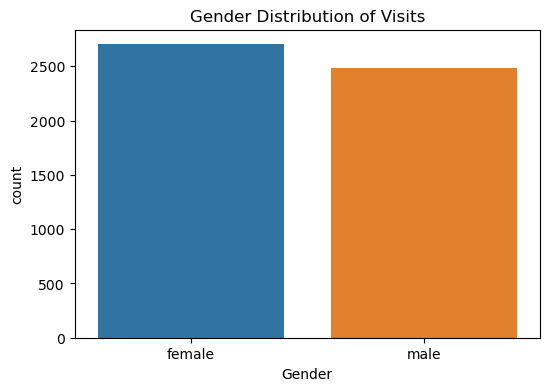

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution of Visits')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

# Age Distribution: Histogram

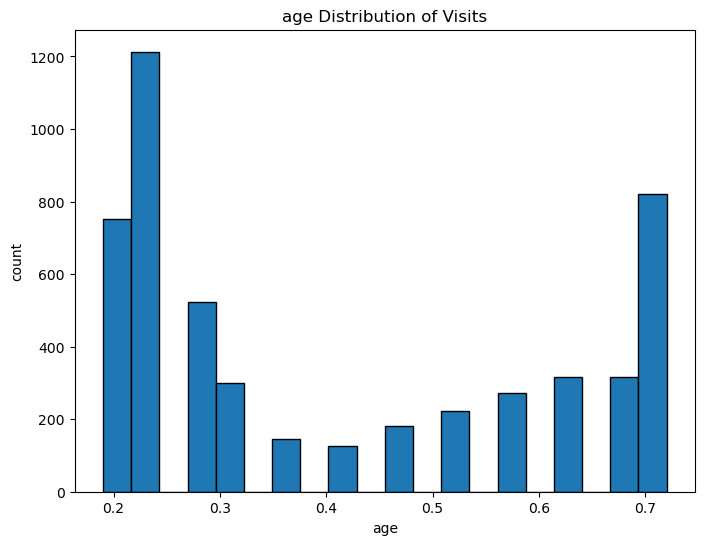

In [19]:
plt.figure(figsize=(8,6))
plt.hist(df['age'],bins=20,edgecolor='k')
plt.title('age Distribution of Visits')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

# Income Analysis : Box Plot

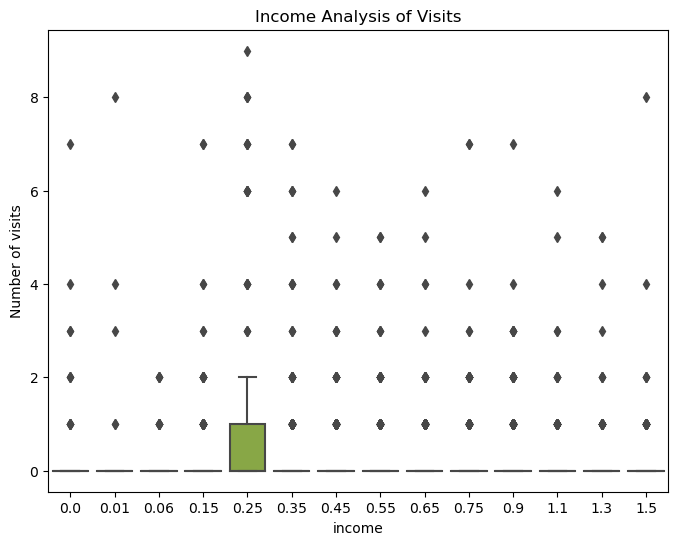

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='income',y='visits',data=df)
plt.title('Income Analysis of Visits')
plt.xlabel('income')
plt.ylabel('Number of visits')
plt.show()

# Illness Breakdown: Pie Chart

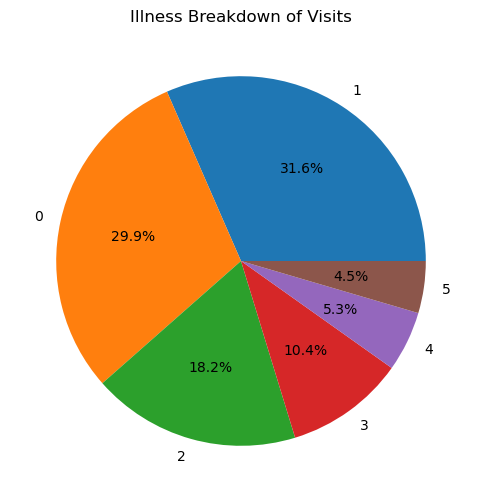

In [21]:
plt.figure(figsize=(6, 6))
df['illness'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Illness Breakdown of Visits')
plt.ylabel('')
plt.show()


# Reduced and Health: Stacked Bar Chart


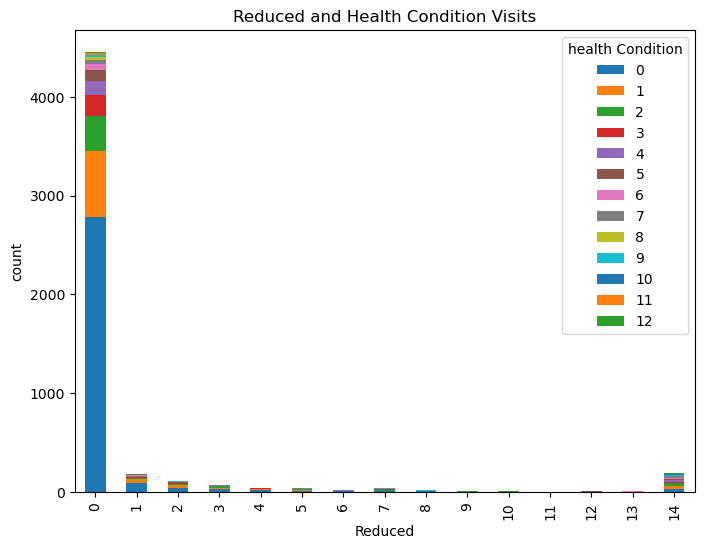

In [6]:
reduced_health_counts = df.groupby(['reduced','health']).size().unstack()
reduced_health_counts.plot(kind='bar',stacked=True,figsize=(8,6))
plt.title('Reduced and Health Condition Visits')
plt.xlabel('Reduced')
plt.ylabel('count')
plt.legend(title='health Condition',loc='upper right')
plt.show()

# Age vs Visits: Scatter Plot


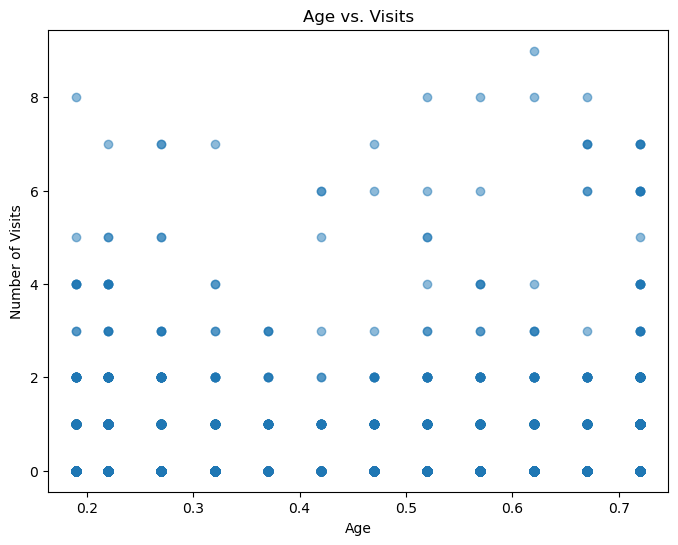

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['visits'], alpha=0.5)
plt.title('Age vs. Visits')
plt.xlabel('Age')
plt.ylabel('Number of Visits')
plt.show()

# Income vs Visits: Scatter Plot

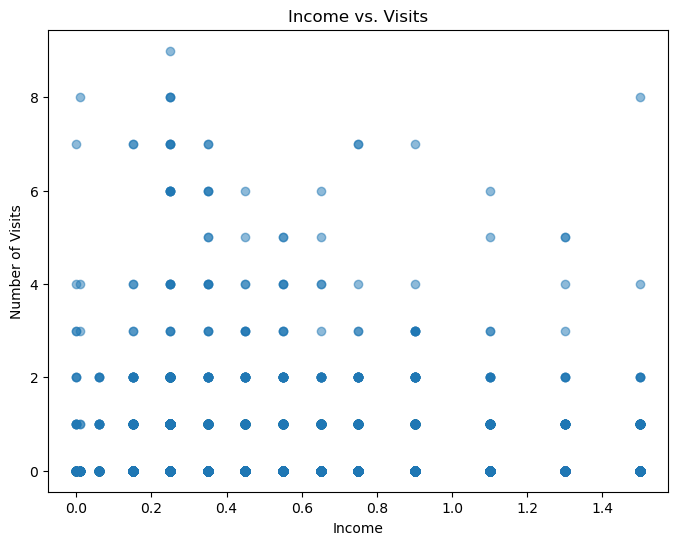

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['income'], df['visits'], alpha=0.5)
plt.title('Income vs. Visits')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()

# Chronic Conditions vs. Visits: Grouped Bar Chart 

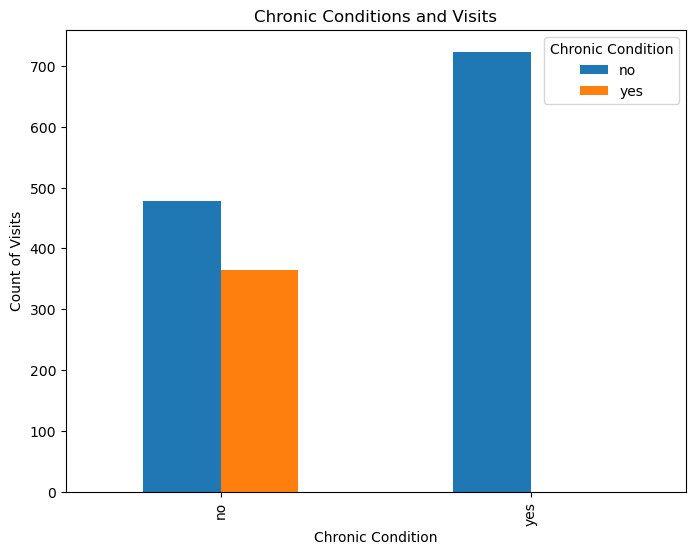

In [20]:
chronic_visits = df.groupby(['nchronic', 'lchronic'])['visits'].sum().unstack()
chronic_visits.plot(kind='bar', figsize=(8, 6))
plt.title('Chronic Conditions and Visits')
plt.xlabel('Chronic Condition')
plt.ylabel('Count of Visits')
plt.legend(title='Chronic Condition', loc='upper right')
plt.show()

#  Private Insurance policy analysis

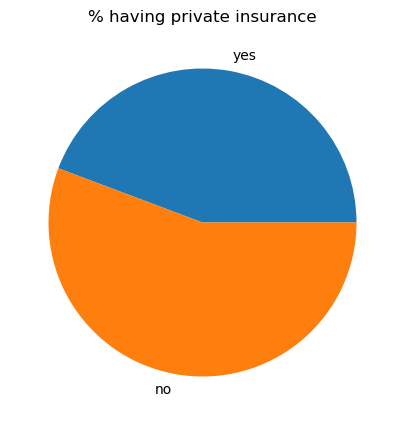

In [28]:
label=['yes','no']
Y=df[df['private']=='yes']
N=df[df['private']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% having private insurance")
plt.show()

# Government Insurance Policy Analysis

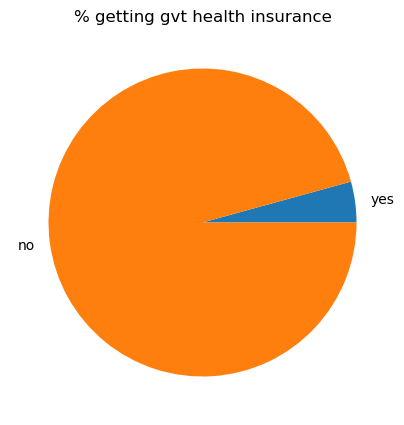

In [29]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% getting gvt health insurance")
plt.show()

# Income Analysis

Text(0, 0.5, 'Income in thousands')

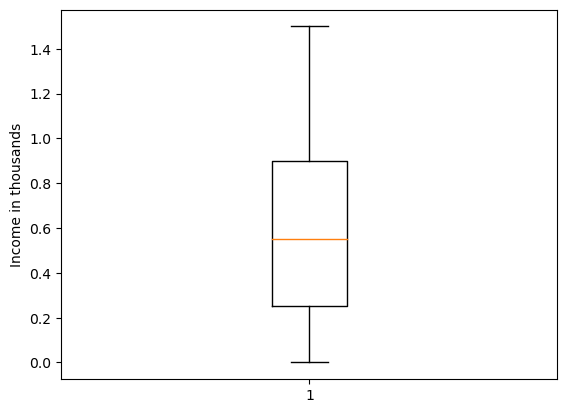

In [30]:
y=list(df.income)
plt.boxplot(y)
plt.ylabel("Income in thousands")


# Insurance Based On Age

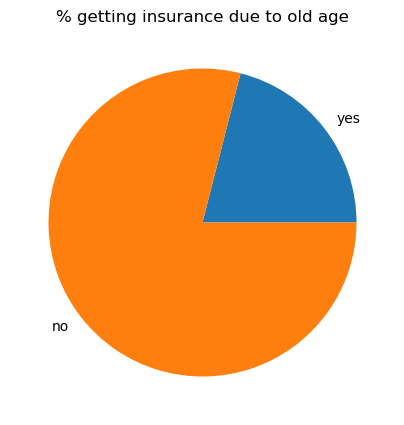

In [31]:
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']

x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% getting insurance due to old age")
plt.show()